In [2]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# fetch dataset 
bank_marketing = fetch_ucirepo(id=222) 
  
# data (as pandas dataframes) 
datos = bank_marketing.data.features 
datos['subscribed'] = bank_marketing.data.targets 

In [4]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          44923 non-null  object
 2   marital      45211 non-null  object
 3   education    43354 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      32191 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     8252 non-null   object
 16  subscribed   45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
datos.describe()

,age,balance,day_of_week,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


## Age

/Users/hfelizzola/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


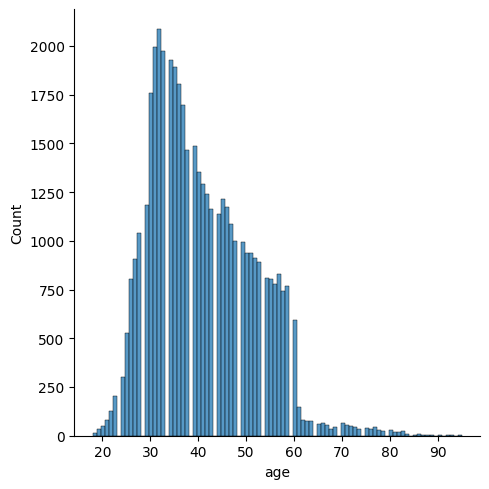

In [6]:
sns.displot(data=datos, x='age')

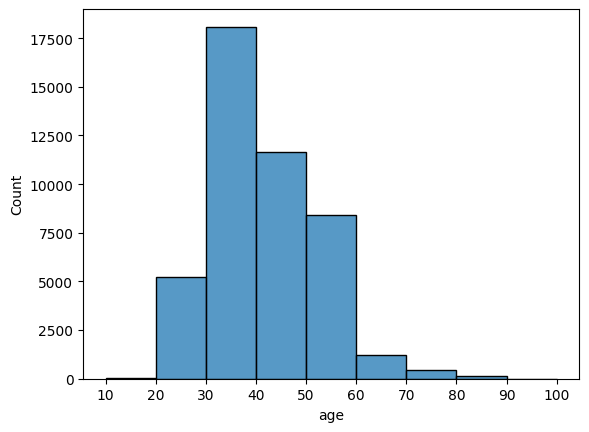

In [8]:
#plt.hist(datos.age, bins=[10,20,30,40,50,60,70,80,90,100], edgecolor="w")
sns.histplot(data=datos, x='age', bins=[10,20,30,40,50,60,70,80,90,100])
plt.xticks([10,20,30,40,50,60,70,80,90,100])
plt.show()

In [16]:
pd.cut(x=datos['age'], bins=[10,20,30,40,50,60,70,80,90,100]).value_counts(sort=False)

(10, 20]        97
(20, 30]      6933
(30, 40]     17687
(40, 50]     11239
(50, 60]      8067
(60, 70]       701
(70, 80]       388
(80, 90]        92
(90, 100]        7
Name: age, dtype: int64

## Job

In [17]:
datos['job'].value_counts(dropna=False)

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
NaN               288
Name: job, dtype: int64

In [37]:
datos['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
Name: education, dtype: int64

In [38]:
datos['default'].value_counts()

no     44396
yes      815
Name: default, dtype: int64

In [39]:
datos['housing'].value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

In [22]:
datos.isna().sum()

age                0
job              288
marital            0
education       1857
default            0
balance            0
housing            0
loan               0
contact        13020
day_of_week        0
month              0
duration           0
campaign           0
pdays              0
previous           0
poutcome       36959
subscribed         0
dtype: int64

In [46]:
datos['campaign'].describe()

count    45211.000000
mean         2.763841
std          3.098021
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         63.000000
Name: campaign, dtype: float64

In [24]:
datos['previous'].value_counts()

0      36954
1       2772
2       2106
3       1142
4        714
5        459
6        277
7        205
8        129
9         92
10        67
11        65
12        44
13        38
15        20
14        19
17        15
16        13
19        11
20         8
23         8
18         6
22         6
24         5
27         5
21         4
29         4
25         4
30         3
38         2
37         2
26         2
28         2
51         1
275        1
58         1
32         1
40         1
55         1
35         1
41         1
Name: previous, dtype: int64

In [28]:
datos[['previous','poutcome']].value_counts(dropna=False)

previous  poutcome
0         NaN         36954
1         failure      1707
2         failure      1362
3         failure       660
1         other         591
                      ...  
21        failure         1
5         NaN             1
7         NaN             1
18        failure         1
275       other           1
Length: 92, dtype: int64

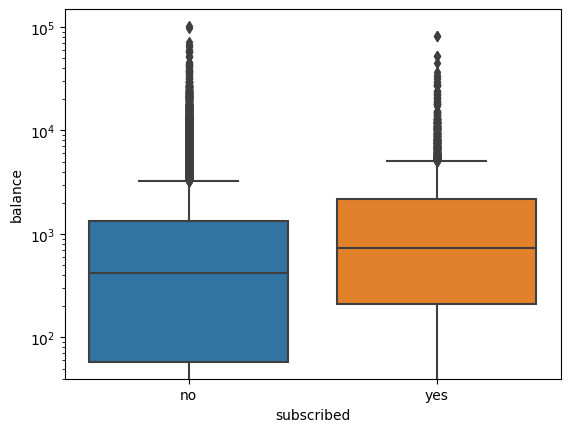

In [33]:
sns.boxplot(data=datos, x='subscribed', y='balance')
plt.yscale('log')

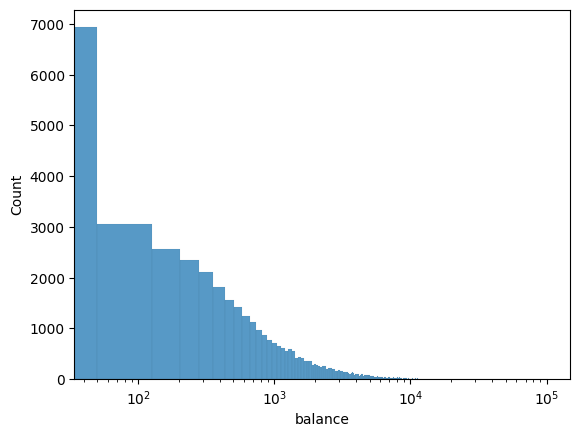

In [35]:
sns.histplot(data=datos, x='balance')
plt.xscale('log')

In [36]:
datos['balance'].describe()

count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64